Descriptive statistics for features (X):
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        0.428704      0.439167       0.467571      0.457778
std         0.230018      0.180664       0.299054      0.317984
min         0.000000      0.000000       0.000000      0.000000
25%         0.222222      0.333333       0.101695      0.083333
50%         0.416667      0.416667       0.567797      0.500000
75%         0.583333      0.541667       0.694915      0.708333
max         1.000000      1.000000       1.000000      1.000000

Class distribution (y):
0    50.0
1    50.0
2    50.0
dtype: float64


<Figure size 1000x600 with 0 Axes>

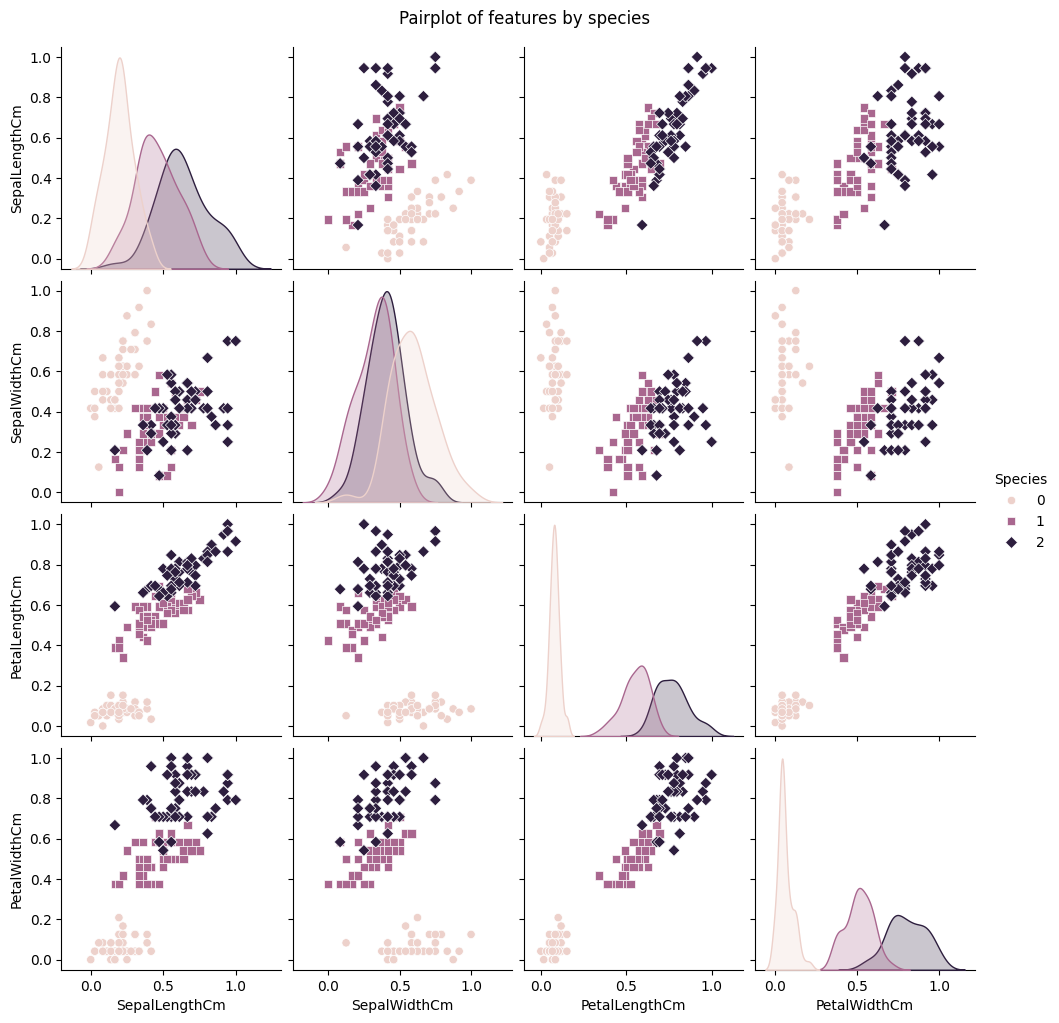

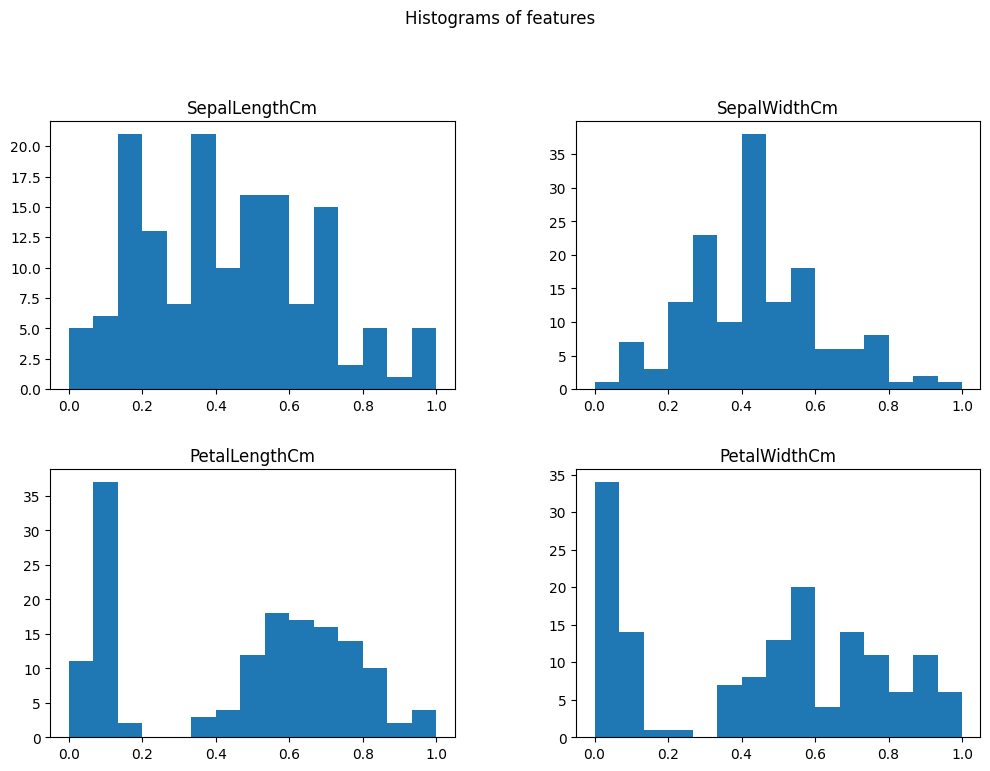

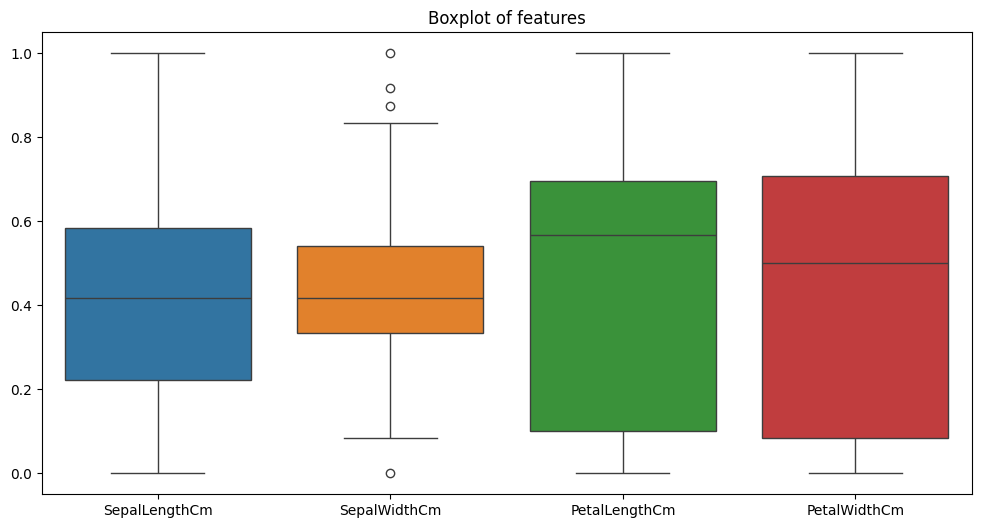

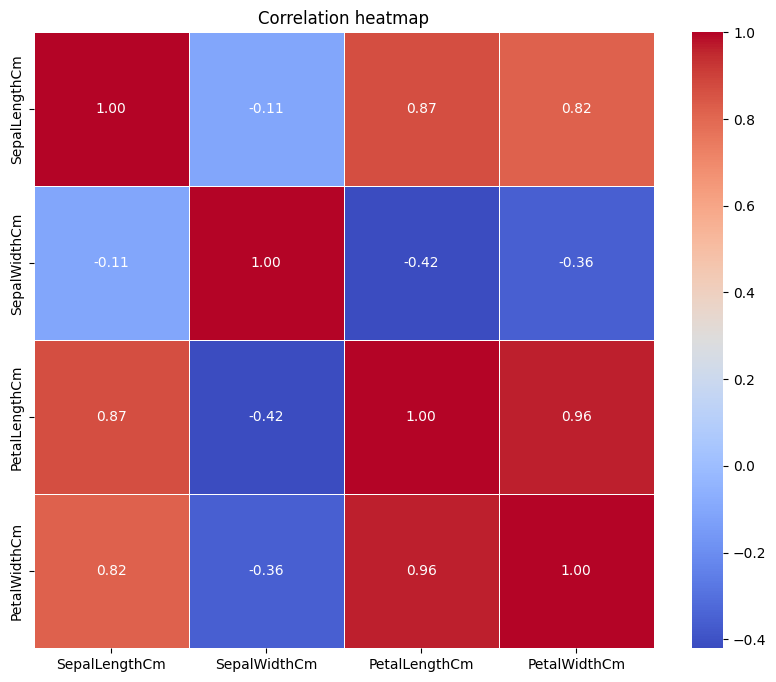

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Loads data from a CSV file and returns X (features) and y (one-hot encoded labels)."""
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")
    except Exception as e:
        raise Exception(f"Error while loading the file: {e}")
    
    X = df.drop(columns=['Id', 'Species'])
    y = one_hot_encoder(df['Species'])
    return X, y

def one_hot_encoder(labels):
    """Converts labels to one-hot encoding."""
    unique_labels = np.unique(labels)
    label_to_index = {label: index for index, label in enumerate(unique_labels)}
    label_indices = np.array([label_to_index[label] for label in labels])
    return np.eye(len(unique_labels))[label_indices]

def split_dataset(X, y, test_size=0.2):
    """Splits dataset into train and test sets, ensuring balanced class distribution."""
    num_samples = len(y)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    split_idx = int(num_samples * (1 - test_size))
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]

    X_train, X_test = X.iloc[train_indices].values, X.iloc[test_indices].values
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

def data_normalization(X):
    """Normalizes the dataset using Min-Max scaling."""
    return (X - X.min()) / (X.max() - X.min())

def analyze_data(X, y):
    """Performs basic data analysis and visualization."""
    # Basic statistics for X
    print("Descriptive statistics for features (X):")
    print(X.describe())
    
    # Class distribution
    print("\nClass distribution (y):")
    print(pd.DataFrame(y).sum(axis=0))

    # Visualize data
    plt.figure(figsize=(10, 6))

    # Pairplot to visualize relationships between features and classes
    df = X.copy()
    df['Species'] = np.argmax(y, axis=1)  # Convert one-hot to label for visualization
    sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
    plt.suptitle('Pairplot of features by species', y=1.02)
    plt.show()

    # Plot histograms for each feature
    X.hist(bins=15, figsize=(12, 8), grid=False)
    plt.suptitle('Histograms of features', y=1.02)
    plt.show()

    # Boxplot for feature distributions
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X)
    plt.title('Boxplot of features')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation heatmap')
    plt.show()

# Load and preprocess data
file_path = os.path.join('..', 'data', 'raw', 'Iris.csv')

X, y = load_data(file_path)
X_normalize = data_normalization(X)
X_train, X_test, y_train, y_test = split_dataset(X_normalize, y)

# Perform data analysis and visualization
analyze_data(X, y)
